## K-means 聚类

我们将实施和应用K-means到一个简单的二维数据集，以获得一些直观的工作原理。 K-means是一个迭代的，无监督的聚类算法，将类似的实例组合成簇。 该算法通过猜测每个簇的初始聚类中心开始，然后重复将实例分配给最近的簇，并重新计算该簇的聚类中心。 我们要实现的第一部分是找到数据中每个实例最接近的聚类中心的函数。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [3]:
# 找到最近中心点
def find_closest_centroids(X, centroids):
    m=X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    for i in range(m):
        # 找到xi 最近的中心点,将第一个簇设置为初始值
        distmin = np.sum((X[i,:]-centroids[0,:]) ** 2)
        # idx[i] = [0]
        for j in range(1,k):# 不在计算第一个
        # 协方差
            dist = np.sum((X[i,:]-centroids[j,:]) ** 2)
            if(dist < distmin):
                distmin = dist
                idx[i] = j
    return idx

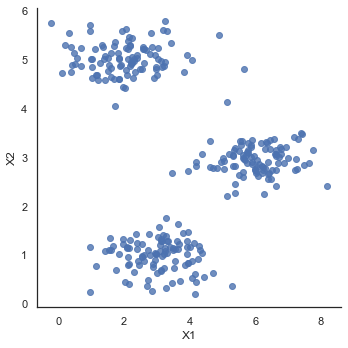

In [6]:
data = loadmat('../data/andrew_ml_ex78376/ex7data2.mat')
data2 = pd.DataFrame(data.get('X'), columns=['X1', 'X2'])
sb.set(context="notebook", style="white")
sb.lmplot('X1', 'X2', data=data2, fit_reg=False)
plt.show()

In [28]:
# 测试这个函数，以确保它的工作正常。 我们将使用练习中提供的测试用例。
X = data['X']
initial_centroids  = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)
# 随机验证
print(X[0],idx[0])# 1.84207953 4.6075716 该点距离[3,3]最近 

[1.84207953 4.6075716 ] 0.0


In [23]:
## 移动簇到平均点
def compute_centroids(X,idx,k):
    m,n = X.shape
    centroids = np.zeros((k, n))
    for i in range(k):
        indices = np.where(idx==i)# 返回符合调节值得下下标（展开后）
        centroids[i,:] = np.sum(X[indices,:],axis=1)/len(indices[0]) 
    return centroids

In [24]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [31]:
# 将上述与距离最近的中心点关联和中心点移动到平均值组合，形成k-means算法
# K-均值算法的伪代码如下：
# ```
# Repeat {
# for i = 1 to m
# c(i) := index (form 1 to K) of cluster centroid closest to x(i)
# for k = 1 to K
# μk := average (mean) of points assigned to cluster k
# }
# ```
#max_iters 移动得次数
def k_means(X,initial_centroids,max_iters):
    m, n = X.shape
    centroids = initial_centroids
    k=centroids.shape[0]
    idx = np.zeros(m)
    for n in range(max_iters):
        idx = find_closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,k)
    return idx,centroids

In [82]:
idx, centroids = k_means(X, initial_centroids, 10)
initial_centroids2  = np.array([[6.5870565 , 3.37508345],[1.57449255, 1.34811126],[5.37293912, 2.81684776]])
print(idx,centroids)

[0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0.] [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


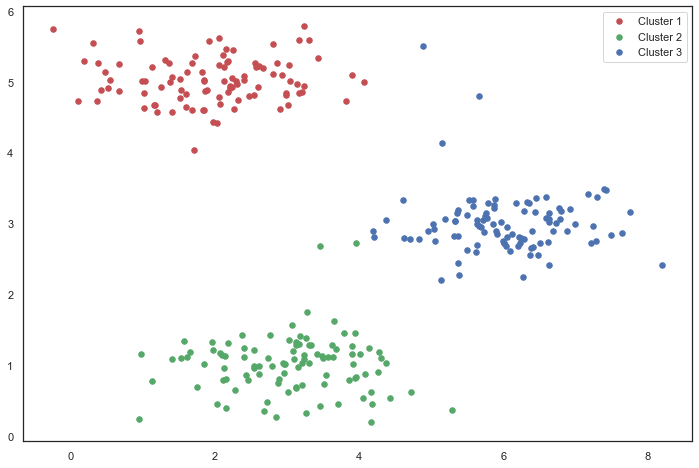

In [83]:
## 作图显示
cluster1 = X[np.where(idx == 0)]
cluster2 = X[np.where(idx == 1)]
cluster3 = X[np.where(idx == 2)]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

In [55]:
#  上面得初始值，需要随机初始化，为了避免k-means取得局部最优
# k<m
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    return centroids

In [77]:
# 代价函数
def J_cost(X,idx,centroids):
    m=X.shape[0]
    sumcost = 0
    for i in range(m):
        sumcost += (X[i,:] - centroids[int(idx[i]),:])**2
    return np.sum(sumcost)/m

In [80]:
## 多次选择代价函数最小得，初始值
def select_init(X,k,max_iters):
    min_centroids = init_centroids(X,k)
    idx =find_closest_centroids(X, min_centroids)
    min_cost = J_cost(X,idx,min_centroids)
    for i in range(1,max_iters):
        min_centroids = init_centroids(X,k)
        idx =find_closest_centroids(X, min_centroids)
        cost = J_cost(X,idx,min_centroids)
        if cost < min_cost:
            min_cost = cost
    return min_cost,min_centroids

In [81]:
select_init(X,3,10)

(1.6236831498217312,
 array([[6.5870565 , 3.37508345],
        [1.57449255, 1.34811126],
        [5.37293912, 2.81684776]]))

## 将K-means应用于图像压缩。 
k-means算法除了可以用于非监督标识类型，也可以通过这种性质，选择更少特征值 k来降维

例如：从下面的演示可以看到，我们可以使用聚类来找到最具代表性的少数颜色，并使用聚类分配将原始的24位颜色映射到较低维的颜色空间。

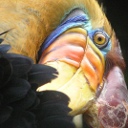

In [84]:
from IPython.display import Image
Image(filename='../data/andrew_ml_ex78376/bird_small.png')

In [85]:
# 原始像素测像素点数值
image_data = loadmat('../data/andrew_ml_ex78376/bird_small.mat')
image_data# [ 14,  15,  13]表示一个像素点的RGB

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [86]:
A = image_data['A']
A.shape

(128, 128, 3)

In [87]:
# 均一化
# normalize value ranges
A = A / 255.
# 很显然图片排列横纵本质没有区别，可以放到一维处理
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [88]:
# 接下来运用k-measn方法从该图像
_,centroids = select_init(X,16,100)
idx,centroids = k_means(X,centroids,10)
# 将idx点的值设置为centroids
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

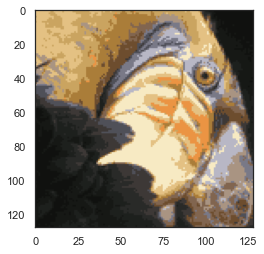

In [89]:
# 展示图片
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
plt.imshow(X_recovered)
plt.show()

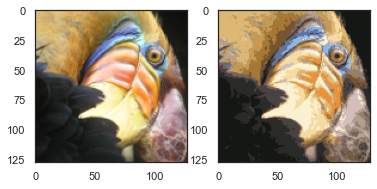

In [92]:
# 可以看到我们对图像进行了压缩，但图像的主要特征仍然存在。 这就是K-means。 下面我们来用scikit-learn来实现K-means。
from sklearn.cluster import KMeans#导入kmeans库
# cast to float, you need to do this otherwise the color would be weird after clustring
pic =  image_data['A'] / 255.
# 数据处理
data = pic.reshape(128*128, 3)
# KMeans算法
model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)
model.fit(data)
centroids = model.cluster_centers_
C = model.predict(data)# 点对应簇的索引
print(centroids[C].shape)
compressed_pic = centroids[C].reshape((128,128,3))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()

## Principal component analysis（主成分分析）¶
PCA是在数据集中找到“主成分”或最大方差方向的线性变换。 它可以用于降维。 在本练习中，我们首先负责实现PCA并将其应用于一个简单的二维数据集，以了解它是如何工作的。 我们从加载和可视化数据集开始。

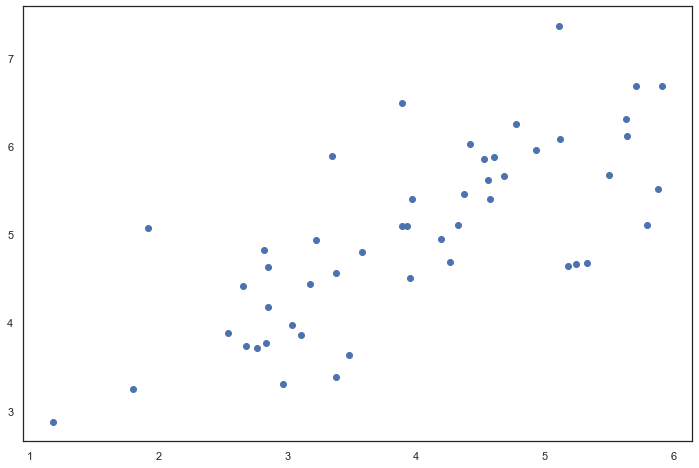

In [95]:
data = loadmat('../data/andrew_ml_ex78376/ex7data1.mat')
X = data['X']
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])
plt.show()

In [96]:
# PCA的算法相当简单。 在确保数据被归一化之后，输出仅仅是原始数据的协方差矩阵的奇异值分解
def pca(X):
    # 归一化
    X = (X - X.mean()) / X.std()
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    return U, S, V

In [97]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [98]:
# 现在我们有主成分（矩阵U），我们可以用这些来将原始数据投影到一个较低维的空间中。 对于这个任务，我们将实现一个计算投影并且仅选择顶部K个分量的函数，有效地减少了维数。
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

In [101]:
Z = project_data(X, U, 1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

In [102]:
# 反向转换步骤来恢复原始数据。
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [103]:
X_recovered = recover_data(Z, U, 1)
X_recovered

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

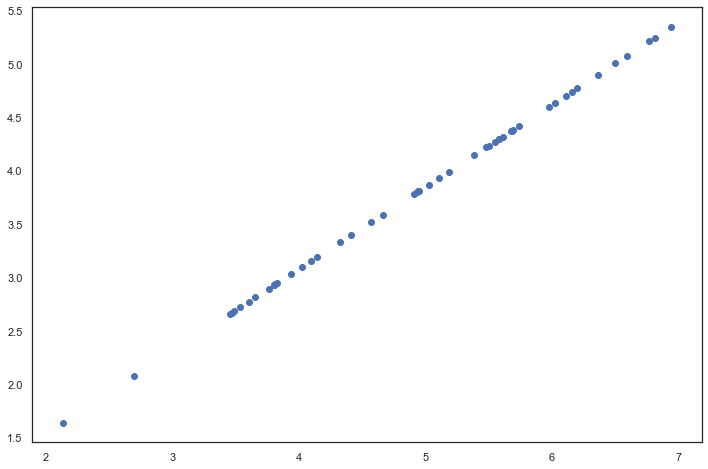

In [104]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(list(X_recovered[:, 0]), list(X_recovered[:, 1]))
plt.show()

请注意，第一主成分的投影轴基本上是数据集中的对角线。 当我们将数据减少到一个维度时，我们失去了该对角线周围的变化，所以在我们的再现中，一切都沿着该对角线。

### 是将PCA应用于脸部图像。 通过使用相同的降维技术，我们可以使用比原始图像少得多的数据来捕获图像的“本质”。

In [105]:
faces = loadmat('../data/andrew_ml_ex78376/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [108]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))
    first_n_images = X[:n, :]
    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                sharey=True, sharex=True, figsize=(8, 8))
    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

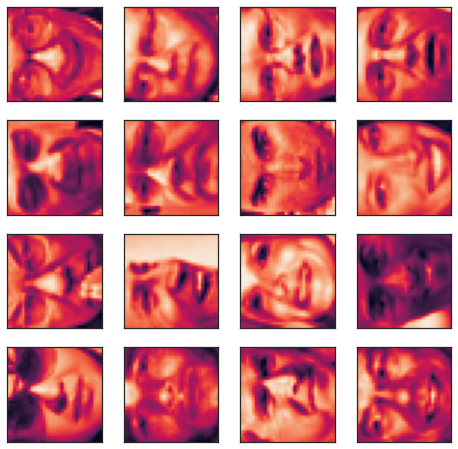

In [119]:
plot_n_image(X, 16)
# X.shape[1]

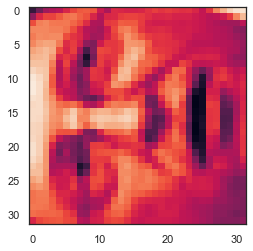

In [123]:
face = np.reshape(X[3,:], (32, 32))# 第三幅图
plt.imshow(face)
plt.show()

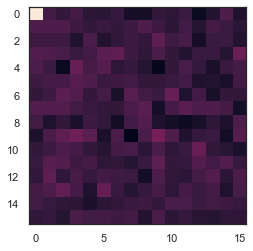

In [126]:
# 看起来很糟糕。 这些只有32 x 32灰度的图像（它也是侧面渲染，但我们现在可以忽略）。 我们的下一步是在面数据集上运行PCA，并取得前100个主要特征
data2 = X[3,:]
U, S, V = pca(data2)
Z2=project_data(data2, U, 256)
face2 = np.reshape(Z2, (16, 16))
plt.imshow(face2)#已经看不出来特征了

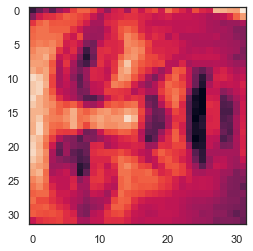

In [130]:
# 然后再恢复
recover_data2 = recover_data(Z2,U,256)
recover_face = np.reshape(recover_data2, (32, 32))
plt.imshow(recover_face)#和之前特征表现基本一致